## Import Export

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import pickle
from __future__ import division
import csv
import tpm_identification
from auxiliar_functions import *


In [2]:
dict_metro = load_metro_dictionary()

In [3]:
frame = pd.read_csv('/home/cata/Documentos/Datois/etapas_2013_abril_allyearsids_10_100000.csv')
frame['tiempo_subida'] = pd.to_datetime(frame.tiempo_subida)
frame = frame.sort_values(by=['id', 'tiempo_subida'])
frame.head()

,tiempo_subida,id,x_subida,y_subida,tipo_transporte,serviciosentidovariante,tipo_dia,nviaje,netapa,x_bajada,y_bajada,tiempo_bajada,par_subida,par_bajada,zona_subida,zona_bajada,adulto
23,2013-04-14 06:45:44,1132106,348108.0,6289153.0,BUS,T203 00R,DOMINGO,1,1,346818.0,6299394.0,2013-04-14 07:07:02,T-22-205-SN-65,E-20-190-SN-40,328.0,307.0,0.0
22,2013-04-14 07:51:52,1132106,346751.0,6299389.0,BUS,T502 00I,DOMINGO,2,1,351363.0,6302549.0,2013-04-14 08:04:11,E-20-291-PO-20,T-15-135-PO-5,307.0,188.0,0.0
21,2013-04-14 19:56:47,1132106,351368.0,6302559.0,BUS,T502 00R,DOMINGO,3,1,346763.0,6299568.0,2013-04-14 20:09:11,T-15-135-OP-110,T-4-19-NS-100,188.0,55.0,0.0
20,2013-04-14 20:15:25,1132106,346713.0,6299427.0,BUS,T203 00I,DOMINGO,3,2,348095.0,6289148.0,2013-04-14 20:40:51,E-20-199-NS-2,T-24-205-NS-20,307.0,348.0,0.0
19,2013-04-15 21:04:59,1132106,348103.0,6289191.0,BUS,T206 00R,LABORAL,4,1,346844.0,6299320.0,2013-04-15 21:33:23,T-22-205-SN-65,T-20-190-SN-35,328.0,309.0,0.0


In [15]:
df_id_period = pd.read_csv('/home/cata/Documentos/Datois/etapas_2013_septiembre_allyearsids_10_100000.csv')
df_id_period['tiempo_subida'] = pd.to_datetime(df_id_period.tiempo_subida)
df_id_period = df_id_period.sort_values(by=['id', 'tiempo_subida'])

In [16]:
df_id_period.head()

,tiempo_subida,id,x_subida,y_subida,tipo_transporte,serviciosentidovariante,tipo_dia,nviaje,netapa,x_bajada,y_bajada,tiempo_bajada,par_subida,par_bajada,zona_subida,zona_bajada,adulto
26,2013-09-23 20:58:46,1132106,348106.0,6289139.0,BUS,T203 00R,LABORAL,1,1,346824.0,6299354.0,2013-09-23 21:23:02,T-22-205-SN-65,E-20-190-SN-40,328.0,307.0,0.0
25,2013-09-23 21:24:25,1132106,346789.0,6299372.0,BUS,T502 00I,LABORAL,1,2,351366.0,6302548.0,2013-09-23 21:37:55,E-20-291-PO-20,T-15-135-PO-5,307.0,188.0,0.0
24,2013-09-24 07:15:40,1132106,351362.0,6302563.0,BUS,T502 00R,LABORAL,2,1,346661.0,6299484.0,2013-09-24 07:32:11,T-15-135-OP-110,T-4-19-NS-100,188.0,55.0,0.0
23,2013-09-24 08:00:08,1132106,346719.0,6299344.0,BUS,T206 06I,LABORAL,3,1,348078.0,6289284.0,2013-09-24 08:36:40,E-20-199-NS-2,T-24-205-NS-20,307.0,348.0,0.0
22,2013-09-24 09:13:22,1132106,347658.0,6289320.0,BUS,T352 00R,LABORAL,3,2,NaN,NaN,NaN,L-24-26-OP-25,NaN,348.0,NaN,NaN


## Get Profiles from both periods

In [32]:
reload(tpm_identification)

<module 'tpm_identification' from 'tpm_identification.pyc'>

In [33]:
users_profiles = tpm_identification.get_profiles(frame['id'],frame['zona_subida'],frame['zona_bajada'])

In [34]:
numero_usuarios = len(users_profiles)
numero_usuarios

5169

In [35]:
profiles = tpm_identification.get_sequences(df_id_period['id'],df_id_period['zona_subida'],df_id_period['zona_bajada'])

In [36]:
len(profiles)

5344

## Check if the ids are the same for both periods

In [37]:
last_iddd = 0
for i in range(len(users_profiles)):
    assert last_iddd < users_profiles[i]['user_id']
    last_iddd = users_profiles[i]['user_id']
    assert users_profiles[i]['user_id'] == profiles[i]['user_id']
    

## Comparee

In [38]:
start_time = time.time()
iden = tpm_identification.get_identification_matrix(users_profiles,profiles)
delta_time = time.time() - start_time

In [40]:
iden_matrix = np.matrix(iden)
df_ident = pd.DataFrame(iden_matrix)
df_ident.head(10)


,0,1,2,3,4,5,6,7,8,9,...,5159,5160,5161,5162,5163,5164,5165,5166,5167,5168
0,-88.111487,-750.000000,-780.000000,-774.000000,-750.000000,-780.00000,-750.00000,-783.000000,-768.000000,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
1,-780.000000,-427.664003,-750.477121,-731.176091,-750.000000,-780.00000,-750.00000,-621.528274,-768.000000,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
2,-780.000000,-775.000000,-363.798233,-774.000000,-750.000000,-780.00000,-750.00000,-783.000000,-672.903090,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
3,-780.000000,-775.000000,-780.000000,-344.289960,-750.000000,-780.00000,-750.00000,-783.000000,-768.000000,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
4,-780.000000,-775.000000,-780.000000,-774.000000,-550.249877,-780.00000,-750.00000,-783.000000,-768.000000,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
5,-780.000000,-775.000000,-780.000000,-774.000000,-750.000000,-780.00000,-750.00000,-783.000000,-768.000000,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
6,-780.000000,-775.000000,-780.000000,-774.000000,-750.000000,-720.09691,-500.29073,-783.000000,-768.000000,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
7,-780.000000,-775.000000,-780.000000,-774.000000,-750.000000,-780.00000,-750.00000,-783.000000,-768.000000,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
8,-780.000000,-775.000000,-750.000000,-774.000000,-750.000000,-780.00000,-750.00000,-783.000000,-288.704365,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
9,-780.000000,-775.000000,-780.000000,-774.000000,-750.000000,-780.00000,-750.00000,-756.000000,-768.000000,-424.071752,...,-792.0,-770.0,-800.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0


In [47]:
i = 0
identified_indexs = []
wrong_indexs = []
correct_indexs = []
selected_indexs = []
n_identified = 0
limit = min(len(users_profiles),len(profiles))
while (i<limit):
    the_index = np.argmax(iden_matrix[:,i])
    selected_indexs.append(np.max(iden_matrix[:,i]))
    identified_indexs.append(the_index)
    if(the_index!=i):
        wrong_indexs.append(the_index)
    else:
        correct_indexs.append(the_index)
        n_identified += 1
    i += 1

In [48]:
porcentaje_correcto = n_identified*100/limit
print str(round(porcentaje_correcto,2))+ "%"

64.98%


In [50]:
a = [] 
b = []
c = []
d = []
d_a = []
d_b = []
for i in range(len(selected_indexs)):
    the_index = np.argmax(iden_matrix[:,i])
    if the_index==i:
        a.append(selected_indexs[i])
        d_a.append(0)
    else:
        b.append(selected_indexs[i])
        c.append(iden_matrix[i,i])
        d_b.append(selected_indexs[i]-iden_matrix[i,i])
        if (selected_indexs[i]-iden_matrix[i,i]) < 20:
            d.append(selected_indexs[i])

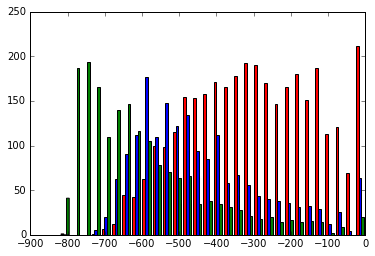

In [51]:
colors = ['red', 'blue','green']
plt.hist([a,b,c], 30, histtype='bar',color=colors)
plt.show()

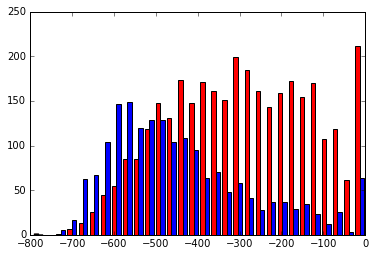

In [52]:
colors = ['red', 'blue']
plt.hist([a,b], 30, histtype='bar',color=colors)
plt.show()

(array([ 150.,   32.,   16.,    7.,    3.,    1.,    0.,    0.,    0.,
           0.,    1.,    0.,    1.,    0.,    0.,    2.,    2.,    3.,    1.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

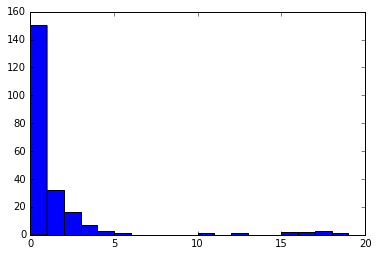

In [53]:
plt.hist(d_b,range(0,20))

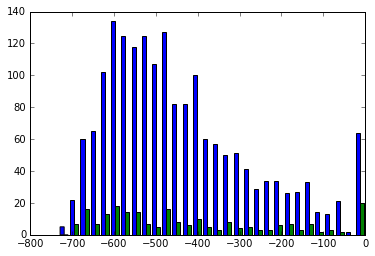

In [54]:
colors = ['blue','green']
plt.hist([b,d], 30, histtype='bar',color=colors)
plt.show()

In [56]:
with open('iden_matrix_zona.pickle','w') as f:
    pickle.dump(iden,f)

### Comparee con paraderos

In [57]:
users_profiles = tpm_identification.get_profiles(frame['id'],frame['par_subida'],frame['par_bajada'])
profiles = tpm_identification.get_sequences(df_id_period['id'],df_id_period['par_subida'],df_id_period['par_bajada'])

In [58]:
start_time = time.time()
iden = tpm_identification.get_identification_matrix(users_profiles,profiles)
delta_time = time.time() - start_time

In [61]:
iden_matrix_paradero = np.matrix(iden)
df_ident_paradero = pd.DataFrame(iden_matrix_paradero)

In [62]:
i = 0
identified_indexs = []
wrong_indexs = []
correct_indexs = []
selected_indexs = []
n_identified = 0
limit = min(len(users_profiles),len(profiles))
while (i<limit):
    the_index = np.argmax(iden_matrix_paradero[:,i])
    selected_indexs.append(np.max(iden_matrix_paradero[:,i]))
    identified_indexs.append(the_index)
    if(the_index!=i):
        wrong_indexs.append(the_index)
    else:
        correct_indexs.append(the_index)
        n_identified += 1
    i += 1

In [63]:
porcentaje_correcto = n_identified*100/limit
print str(round(porcentaje_correcto,2))+ "%"

67.54%


In [64]:
a = [] 
b = []
c = []
d = []
d_a = []
d_b = []
for i in range(len(selected_indexs)):
    the_index = np.argmax(iden_matrix_paradero[:,i])
    if the_index==i:
        a.append(selected_indexs[i])
        d_a.append(0)
    else:
        b.append(selected_indexs[i])
        c.append(iden_matrix[i,i])
        d_b.append(selected_indexs[i]-iden_matrix_paradero[i,i])
        if (selected_indexs[i]-iden_matrix_paradero[i,i]) < 20:
            d.append(selected_indexs[i])

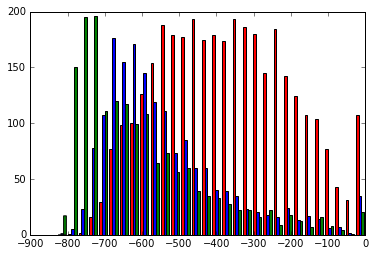

In [65]:
colors = ['red', 'blue','green']
plt.hist([a,b,c], 30, histtype='bar',color=colors)
plt.show()

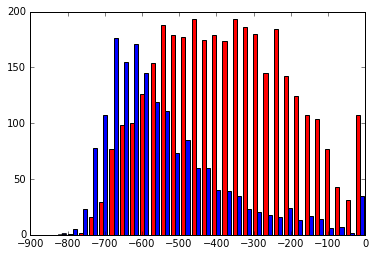

In [66]:
colors = ['red', 'blue']
plt.hist([a,b], 30, histtype='bar',color=colors)
plt.show()

(array([ 153.,   38.,   10.,    6.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    3.,    2.,    3.,    1.,    5.,    4.,    5.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

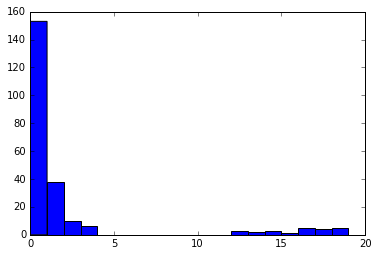

In [67]:
plt.hist(d_b,range(0,20))

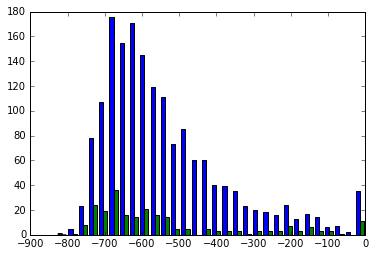

In [68]:
colors = ['blue','green']
plt.hist([b,d], 30, histtype='bar',color=colors)
plt.show()

In [69]:
with open('iden_matrix_paradero.pickle','w') as f:
    pickle.dump(iden,f)